In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


In [12]:
#read the data file
data = pd.read_excel("D:\datamining\HotelCustomersDataset.xlsx")

#print the data
print(data)
print(data.info())

#percentage of missing values in each column
print(data.isna().sum()/data.shape[0] * 100)

#drop the null or NaN values and reset the index
data = data.dropna().reset_index(drop=True)
print(data)

#print the number of unique values in each column
data.nunique()

#drop the not needed columns
data = data.drop(columns=['NameHash','DocIDHash','DistributionChannel','MarketSegment'])

#drop the duplicates
data.drop_duplicates(inplace=True)
print(data.info())

df = data.copy()


          ID Nationality   Age  DaysSinceCreation  \
0          1         PRT  51.0                150   
1          2         PRT   NaN               1095   
2          3         DEU  31.0               1095   
3          4         FRA  60.0               1095   
4          5         FRA  51.0               1095   
...      ...         ...   ...                ...   
83585  83586         ITA  54.0                  0   
83586  83587         IRL  47.0                  0   
83587  83588         IRL  53.0                  0   
83588  83589         IRL  85.0                  0   
83589  83590         IRL  13.0                  0   

                                                NameHash  \
0      0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1      0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2      0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3      0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4      0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...   
...

In [18]:
df.nunique().to_frame(name = 'Number of unique values')

,Number of unique values
ID,83590
Nationality,188
Age,105
DaysSinceCreation,1095
NameHash,80642
DocIDHash,76993
AverageLeadTime,418
LodgingRevenue,10257
OtherRevenue,4490
BookingsCanceled,6


TotalPrice
0.00        DEU
1.00        PRT
2.00        PRT
2.50        FRA
3.00        ESP
           ... 
9576.80     GBR
10324.50    NAM
10982.40    USA
11081.15    PRT
11930.66    DEU
Name: Nationality, Length: 16379, dtype: object
            pnationality
TotalPrice              
0.00                 146
1.00                   2
2.00                   6
2.50                   2
3.00                   3
...                  ...
9576.80                1
10324.50               1
10982.40               1
11081.15               1
11930.66               1

[16379 rows x 1 columns]


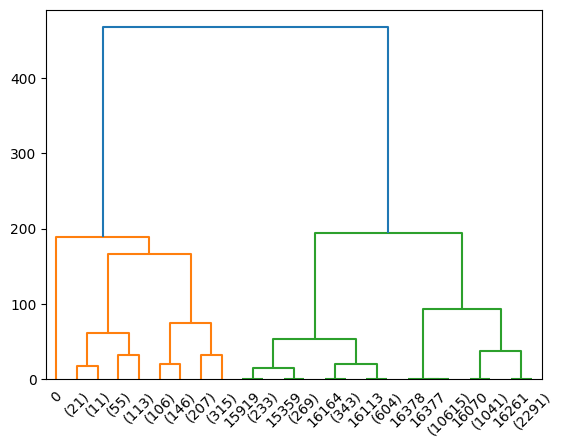

In [13]:
data['TotalPrice'] = data['LodgingRevenue'] + data['OtherRevenue']
print(data.groupby('TotalPrice')['Nationality'].unique().str[0])
customer_data = pd.DataFrame({'pnationality': data.groupby('TotalPrice')['Nationality'].nunique()})
print(customer_data)


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0,
                                n_clusters=None,
                                linkage='ward').fit(customer_data)

plot_dendrogram(model, truncate_mode="level", p=4)
plt.show()

In [15]:
import pandas as pd 
import numpy as np



import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA

In [14]:
PATH = 'D:/datamining/HotelCustomersDataset.xlsx'
df = pd.read_excel(PATH)
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [17]:
df.nunique().to_frame(name = 'Number of unique values')

,Number of unique values
ID,83590
Nationality,188
Age,105
DaysSinceCreation,1095
NameHash,80642
DocIDHash,76993
AverageLeadTime,418
LodgingRevenue,10257
OtherRevenue,4490
BookingsCanceled,6


In [20]:
df.describe().T.style.set_properties(**{'background-color': '#282120','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
ID,83590.000000,41795.500000,24130.498838,1.000000,20898.250000,41795.500000,62692.750000,83590.000000
Age,79811.000000,45.398028,16.572368,-11.000000,34.000000,46.000000,57.000000,122.000000
DaysSinceCreation,83590.000000,453.640902,313.390291,0.000000,177.000000,397.000000,723.000000,1095.000000
AverageLeadTime,83590.000000,66.196028,87.758990,-1.000000,0.000000,29.000000,103.000000,588.000000
LodgingRevenue,83590.000000,298.802087,372.851892,0.000000,59.000000,234.000000,402.000000,21781.000000
OtherRevenue,83590.000000,67.589132,114.327776,0.000000,2.000000,38.500000,87.675000,7730.250000
BookingsCanceled,83590.000000,0.002022,0.066770,0.000000,0.000000,0.000000,0.000000,9.000000
BookingsNoShowed,83590.000000,0.000634,0.029545,0.000000,0.000000,0.000000,0.000000,3.000000
BookingsCheckedIn,83590.000000,0.794617,0.695778,0.000000,1.000000,1.000000,1.000000,66.000000
PersonsNights,83590.000000,4.649133,4.567673,0.000000,1.000000,4.000000,6.000000,116.000000


In [21]:
df = df[df['Age'] > 0] # Remove negative & null values
df = df[df['AverageLeadTime'] >= 0] 

print('The total number of negative values of age is ', len(df[df['Age'] < 0]))
print('The total number of missing values of age column is', df['Age'].isnull().sum())
print('The total number of negative values of averageLeadTime is ', len(df[df['AverageLeadTime'] < 0]))

The total number of negative values of age is  0
The total number of missing values of age column is 0
The total number of negative values of averageLeadTime is  0


In [22]:
# Remove Columns
cols = ['DocIDHash', 'NameHash']
df.drop(cols,axis = 1, inplace = True)

# Change Type
df['ID'] = df['ID'].astype(str)

In [52]:
top_15 = df['Nationality'].value_counts().head(15)
fig = px.pie( values = top_15.values,names=top_15.keys(), title='Distributoion of Nationalities')
fig.show()

In [53]:
# Remove outliars
df = df[df['Age'] < 100]
# Remove ID column
df.drop('ID', axis = 1, inplace = True)

In [54]:
num_of_countries = df['Nationality'].nunique()
print('The number of nationalities before preprocessing is %s' %num_of_countries)

The number of nationalities before preprocessing is 187


In [55]:
# Remove unimportant nationalities 
names = df.groupby('Nationality').count().sort_values(by = 'Age', ascending = False)
top_15_nationalities = list(names[names['Age'] < 1000]['Age'].keys())

for i in top_15_nationalities:
    df['Nationality'] = df['Nationality'].str.replace(i,'')
    
print('The number of nationalities after preprocessing is %s' %df['Nationality'].nunique())

The number of nationalities after preprocessing is 16


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [61]:
# Encoding Variables
transformer = make_column_transformer(
    (OneHotEncoder(), ['Nationality', 'MarketSegment', 'DistributionChannel']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df2 = pd.concat([transformed_df, df], axis=1)

# Remove old columns
df2.drop(['Nationality', 'MarketSegment', 'DistributionChannel'], axis = 1, inplace = True)
print('The shape after encoding: {}'.format(df2.shape))

The shape after encoding: (79735, 77)


In [63]:
# Normalize Data
df_scaled = ((df2 - df2.min()) / (df2.min() + df2.max())) * 9 + 1

In [64]:
df_scaled.describe()

,onehotencoder__Nationality_,onehotencoder__Nationality_AUT,onehotencoder__Nationality_BEL,onehotencoder__Nationality_BRA,onehotencoder__Nationality_CAN,onehotencoder__Nationality_CHE,onehotencoder__Nationality_DEU,onehotencoder__Nationality_ESP,onehotencoder__Nationality_FRA,onehotencoder__Nationality_GBR,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,...,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000
mean,2.341055,1.167843,1.351828,1.326883,1.171907,1.237712,2.153797,1.552743,2.400652,1.976133,...,1.007901,1.026300,1.016028,1.117615,4.215439,2.291729,1.003160,1.032169,1.001129,1.818449
std,3.204870,1.217554,1.744336,1.683784,1.231921,1.443236,3.008827,2.160839,3.262541,2.798654,...,0.266550,0.485806,0.379470,1.022111,4.312787,3.155491,0.168626,0.537113,0.100784,2.587714
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [65]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) # Gets a random centroid from each column
        centroids.append(centroid)
        
    return pd.concat(centroids, axis = 1)

In [66]:
sample_centroids = random_centroids(df_scaled, 3) # get 3 samples of of centroids from each column
sample_centroids

C:\Users\nosib\AppData\Local\Temp\ipykernel_7208\668260651.py:4: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



,0,1,2
onehotencoder__Nationality_,1.0,1.0,1.0
onehotencoder__Nationality_AUT,1.0,1.0,1.0
onehotencoder__Nationality_BEL,1.0,1.0,1.0
onehotencoder__Nationality_BRA,1.0,1.0,10.0
onehotencoder__Nationality_CAN,1.0,1.0,1.0
...,...,...,...
SRTwinBed,1.0,1.0,1.0
SRNearElevator,1.0,1.0,1.0
SRAwayFromElevator,1.0,1.0,1.0
SRNoAlcoholInMiniBar,1.0,1.0,1.0


In [67]:
sample_centroids.apply(lambda x: np.sqrt((df_scaled - x)**2 ).sum(axis = 1)) # Calculate the distance

,0,1,2
0,77.818003,69.876172,140.069815
1,73.685494,56.255724,80.118164
2,77.701823,61.910319,100.444347
3,74.984463,52.729951,94.406824
4,57.888977,60.745358,100.231501
...,...,...,...
79730,45.672671,48.521731,93.735054
79731,43.954640,65.682807,75.513399
79732,45.487104,66.521731,75.920621
79733,70.062869,66.055234,112.582963


In [68]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt((data - x)**2 ).sum(axis = 1)) # Calculate the distance
    return distances.idxmin(axis = 1) # Label each point by getting the index of the leastest value (nearest point)
sample_labels = get_labels(df_scaled,sample_centroids)
sample_labels.value_counts()

0    42952
1    35858
2      925
Name: count, dtype: int64

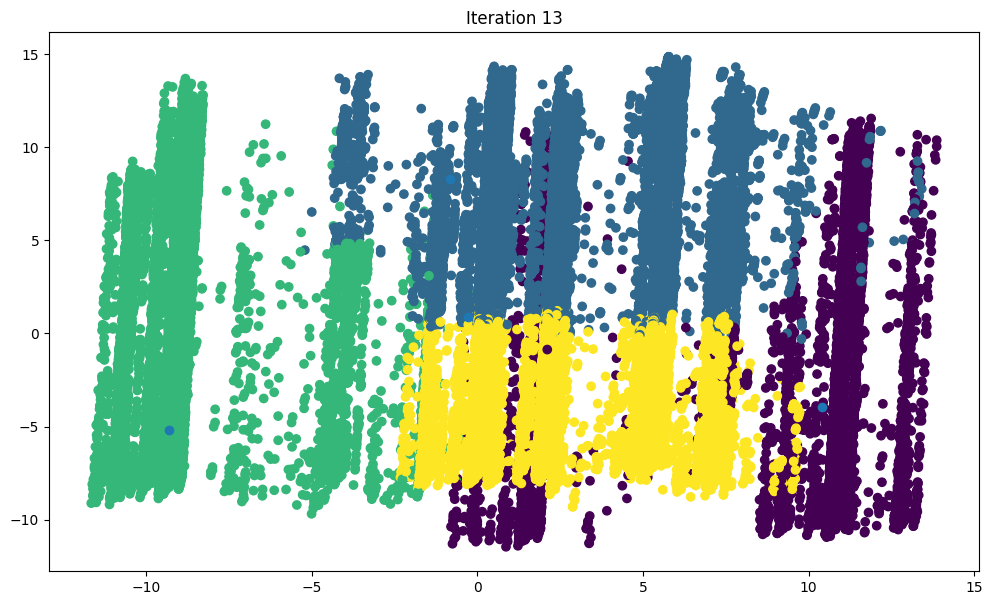

In [80]:
# Update values
def new_centroids(data, labels):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
from IPython.display import clear_output
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) # Reduce dimensonality for visualiztion
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T)
    clear_output(wait = True) # Clear the output and then rewrite the board
    plt.figure(figsize = (12,7))
    plt.title('Iteration {}'.format(iteration))
    plt.scatter(x = data_2d[:, 0], y = data_2d[:, 1], c = labels )
    plt.scatter(x = centroids_2d[:, 0], y = centroids_2d[:, 1] )
    plt.show()

max_iteration = 22
k = 4
centroids = random_centroids(df_scaled, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df_scaled, centroids)
    centroids = new_centroids(df_scaled, labels)
    plot_clusters(df_scaled, labels, centroids, iteration)
    iteration += 1    

In [81]:
# Initalize Labels column
df['labels'] = labels

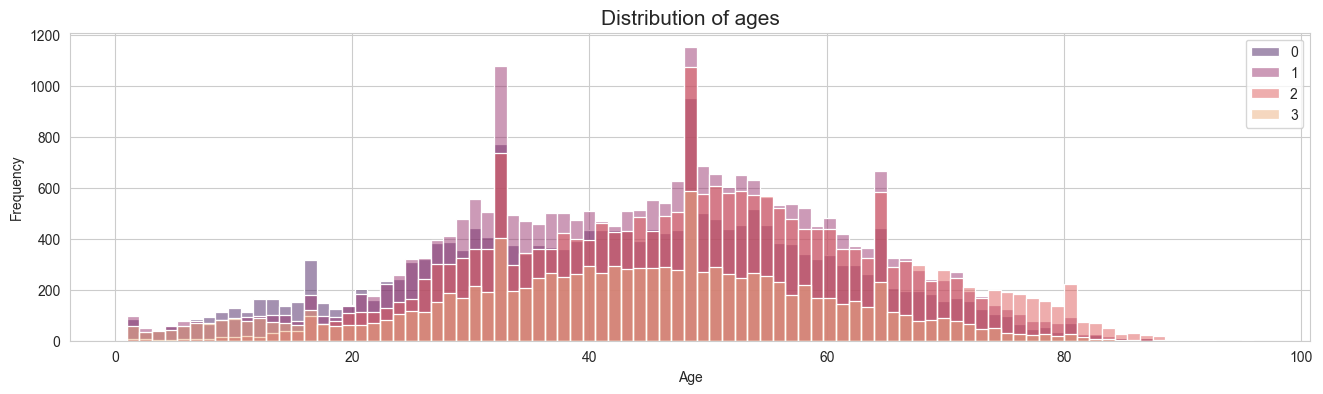

In [82]:
plt.figure(figsize = (16,4))
sns.set_style('whitegrid')
sns.histplot(data = df, x="Age", fill = True, color = '#41be78', hue = "labels",palette = 'flare' )
plt.title('Distribution of ages', fontsize = 15)
plt.xlabel('Age')
plt.legend(labels = [0,1,2,3])
plt.ylabel('Frequency')
plt.show()

In [83]:
df[labels == 3]

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,labels
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,3
1,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,,49.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9,IRL,27.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79726,DEU,48.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
79729,ITA,52.0,0,116,336.9,105.5,0,0,1,8,...,0,0,0,0,0,0,0,0,0,3
79730,ITA,54.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
79733,IRL,85.0,0,109,981.3,9.0,0,0,1,6,...,0,0,0,0,1,0,0,0,0,3


C:\Users\nosib\AppData\Local\Temp\ipykernel_7208\1178660802.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




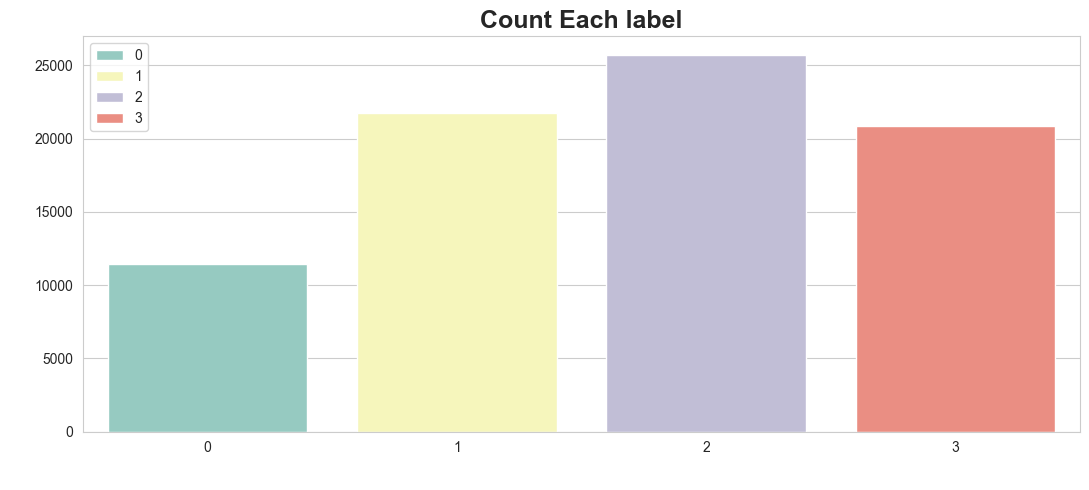

In [85]:
plt.figure(figsize = (11,5))
sns.set_style('whitegrid')

ax = sns.countplot(x='labels', dodge=False, data=df, palette="Set3")
ax.set_title('Count Each label', fontsize=18, fontweight='bold')
ax.set_xlabel('Label', fontsize=15, color='white')
ax.set_ylabel('count', fontsize=15, color='white')
ax.legend(labels = [0,1,2,3])
plt.tight_layout()
plt.show()